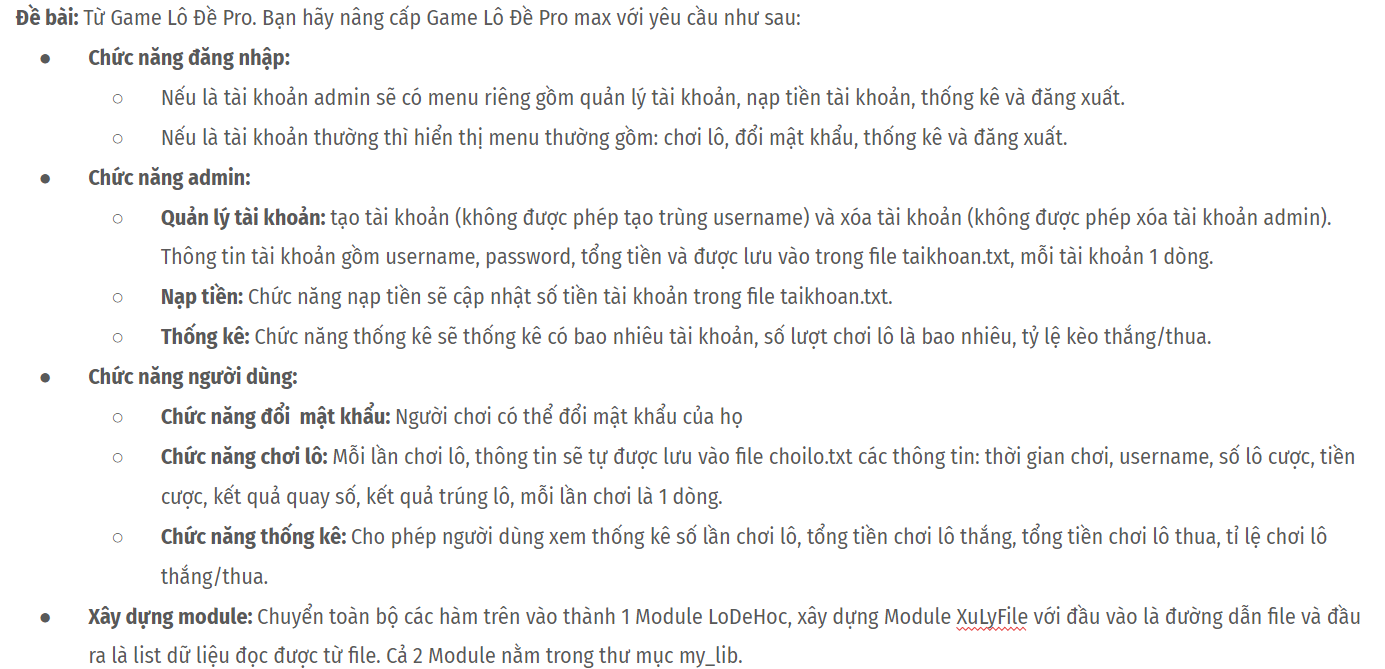

## Hướng dẫn nâng cấp lên game Lô Đề Học Pro Max

Với bài này, ta cần xây dựng nâng cấp chức năng đọc/ghi file và tổ chức xây dựng thành một module.

Ta sẽ cần xây dựng trước một hàm đọc/ghi file để có thể tái sử dụng nhiều lần. Với đầu vào đầu ra như sau:

|Hàm|Đầu vào|Đầu ra|
|--|--|--|
|doc_file|Đường dẫn tới file, mode đọc file|Dữ liệu dạng list đọc được từ file|
|ghi_file|Dữ liệu ghi file, tên của file và mode ghi file|Trạng thái nếu có lỗi ghi file|


In [77]:
import random

In [1]:
def ghi_file(data, ten_file, mode):
    try:
        with open(ten_file, mode) as file:
            for line in data:
                file.write(line)
    except Exception as e:
        print(f"Có lỗi xảy ra: {e}")


def doc_file(duong_dan, mode):
    try:
        with open(duong_dan, mode) as file:
            du_lieu = [line.strip().split(',') for line in file.readlines()]
        return du_lieu
    except Exception as e:
        print(f"Có lỗi xảy ra khi đọc file: {e}")
        return None


Dự kiến sẽ cần đọc ghi file từ đường dẫn có trong thư mục data nên ta tạo folder data và biến lưu data đường dẫn luôn

In [11]:
PATH_DATA_TAI_KHOAN = "./data/taikhoan.txt"
PATH_DATA_CHOI_LO = "./data/choilo.txt"

Ta tạo một hàm khởi tạo tài khoản để thêm tài khoản admin và tài khoản thường vào data

In [12]:
def tao_tai_khoan(username, password, tong_tien):
    user_info = f"{username},{password},{tong_tien}\n"
    ghi_file([user_info], PATH_DATA_TAI_KHOAN, "a")
    print(f"Tạo tài khoản {username} thành công")

In [13]:
tao_tai_khoan("admin", "admin", "1000000")

Tạo tài khoản admin thành công


In [25]:
tao_tai_khoan("dang", "123456", "1000000")

Tạo tài khoản dang thành công


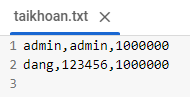

Kiểm tra xem hàm đọc có đọc được không

In [26]:
lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
lst_taikhoan

[['admin', 'admin', '1000000'], ['dang', '123456', '1000000']]

Ta dựng luôn hàm lấy thông tin tài khoản đề sau đỡ phải chạy nhiều cú pháp

In [65]:
def lay_thong_tin_tai_khoan(username):
    try:
        du_lieu_tai_khoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
        if du_lieu_tai_khoan:
            for tai_khoan in du_lieu_tai_khoan:
                if tai_khoan[0] == username:
                    return tai_khoan
        else:
            return None
    except Exception as e:
        print(f"Có lỗi xảy ra: {e}")
        return None

In [66]:
lay_thong_tin_tai_khoan("admin")

['admin', 'admin', '1000000']

### Chức năng đăng nhập

Ta chỉ cần tạo 2 menu riêng cho mỗi loại user là được

In [40]:
def menu():
    print("GAME LÔ ĐỀ HỌC")
    print("1. Chơi lô")
    print("2. Đổi mật khẩu")
    print("3. Thống kê")
    print("4. Đăng xuất")

def menu_admin():
    print("ADMIN GAME LÔ ĐỀ HỌC")
    print("1. Tạo tài khoản")
    print("2. Xóa tài khoản")
    print("3. Nạp tiền tài khoản")
    print("4. Thống kê")
    print("5. Đăng xuất")


Sau đó khai báo biến toàn cục để lưu trạng thái đăng nhập và tên user

In [21]:
dang_nhap_status = False
user = ""

Ta sẽ tạo hàm kiểm tra tài khoản admin, đầu vào là tên user nếu là tài khoản admin thì trả về 1 và ngược lại là 0

In [20]:
def kiem_tra_admin(username):
    if username == "admin":
        return 1
    else:
        return 0

Tiếp tục, tạo hàm kiểm tra tài khoản với đầu vào là tài khoản mật khẩu người dùng, kết hợp với hàm kiểm tra admin. Tiến hành lấy danh sách tài khoản, sử dụng hàm đọc file đã có. Nếu trả về 0,1 thì được coi là đăng nhập thành công, trả về null (không có giá trị gì) thì là đăng nhập thất bại:

In [22]:
def kiem_tra_tai_khoan(username, password):
    global dang_nhap_status, user
    # Đọc dữ liệu từ file tài khoản
    lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
    if lst_taikhoan is None:
        return

    for tai_khoan in lst_taikhoan:
        if tai_khoan[0] == username and tai_khoan[1] == password:
            return kiem_tra_admin(username)

Ta tạo hàm kiểm tra đăng nhập, nếu true là đăng nhập thành công, false là thật bại

In [30]:
def check_dang_nhap(username, password):
    if kiem_tra_tai_khoan(username, password) in (0,1):
        return True
    else:
        return False

In [31]:
check_dang_nhap("admin", "admin")

True

In [32]:
check_dang_nhap("dang","123")

False

Hoàn thiện hàm đăng nhập. Chạy hàm xong sẽ lưu trạng thái đăng nhập và tên user vào biến (học thì mình lưu vậy thôi, chứ thực tế làm thế này hacker lỏ chỉ cần gán giá trị username và trạng thái đăng nhập vào thì game là phù du)


In [35]:
def dang_nhap():
    global dang_nhap_status, user
    print("---GAME LÔ ĐỀ HỌC---")
    print("Vui lòng đăng nhập để chơi game")

    while True:
        username = input("Nhập username: ")
        password = input("Nhập password: ")

        if check_dang_nhap(username, password):
            user = username
            dang_nhap_status = True
            break
        else:
            print("Sai tên người dùng hoặc mật khẩu, vui lòng thử lại.")

In [36]:
dang_nhap()

---GAME LÔ ĐỀ HỌC---
Vui lòng đăng nhập để chơi game
Nhập username: admin
Nhập password: admin


In [37]:
print(f"User: {user}, trạng thái {dang_nhap_status}")

User: admin, trạng thái True


Vậy tư duy để ra được menu admin hay thường thì chỉ cần if else là được (sau này pro thì mình có thể lưu thêm biến quyền admin hay thường vào tài khoản cũng được)

In [41]:
if dang_nhap_status == False:
    dang_nhap()
if user == "admin":
    menu_admin()
else:
    menu()

ADMIN GAME LÔ ĐỀ HỌC
1. Tạo tài khoản
2. Xóa tài khoản
3. Nạp tiền tài khoản
4. Thống kê
5. Đăng xuất


### Chức năng Admin

#### Nhóm chức năng quản lý tài khoản

Ta thấy trong đề bài yêu cầu rất đơn giản là:
* Tạo tài khoản
* Xóa tài khoản

##### Tạo tài khoản

Thật tình cờ và thật bất ngờ, ta đã có hàm tạo tài khoản từ lúc tạo hàm đọc /ghi file rồi :))
```
def tao_tai_khoan(username, password, tong_tien):
    user_info = f"{username},{password},{tong_tien}\n"
    ghi_file([user_info], PATH_DATA_TAI_KHOAN, "a")
    print(f"Tạo tài khoản {username} thành công")
```

Tuy nhiên có một điều, là khi tạo tài khoản, mình sẽ không được tạo trùng username, vậy nên mình cần tạo một hàm kiểm tra xem có tồn tại username trong tệp hay không

In [43]:
def kiem_tra_ton_tai_tai_khoan(username):
    # Đọc dữ liệu từ file tài khoản
    lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
    if lst_taikhoan is None:
        return False

    # Kiểm tra xem tài khoản đã tồn tại chưa
    for tai_khoan in lst_taikhoan:
        if tai_khoan[0] == username:
            return True

    return False

In [44]:
kiem_tra_ton_tai_tai_khoan("admin")

True

In [45]:
kiem_tra_ton_tai_tai_khoan("username")

False

Ta cũng không cho phép tạo tài khoản admin (thực ra đã bao gồm trong hàm `kiem_tra_ton_tai_tai_khoan` rồi, nhưng mình cứ cho vào để sau nếu mở rộng, thay vì check username, ta có thể check quyền của user khởi tạo

In [55]:
username = input("Nhập username cần tạo: ")
if kiem_tra_ton_tai_tai_khoan(username) == True:
    print("Tài khoản user đã tồn tại")
elif username == "admin":
    print("Không được tạo tài khoản admin")
else:
    password = input("Nhập password cần tạo: ")
    tong_tien = input("Nhập số tiền: ")
    tao_tai_khoan(username, password, tong_tien)

Nhập username cần tạo: lintinh
Nhập password cần tạo: 123456
Nhập số tiền: 100000
Tạo tài khoản lintinh thành công


In [48]:
username = input("Nhập username cần tạo: ")
if kiem_tra_ton_tai_tai_khoan(username) == True:
    print("Tài khoản user đã tồn tại")
elif username == "admin":
    print("Không được tạo tài khoản admin")
else:
    password = input("Nhập password cần tạo: ")
    tong_tien = input("Nhập số tiền: ")
    tao_tai_khoan(username, password, tong_tien)

Nhập username cần tạo: dang
Tài khoản user đã tồn tại


Check lại xem đã tạo đúng chưa

In [53]:
lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
lst_taikhoan

[['admin', 'admin', '1000000'], ['dang', '123456', '1000000']]

##### Xóa tài khoản

Với lst tài khoản đọc được, ta xác định lst_taikhoan[0] chính là username. Vậy nên ta chỉ cần tìm đúng user đó và remove nó thôi. Nhưng remove trên list thì cũng phải ghi lại bằng hàm ghi file nha:

In [57]:
def xoa_tai_khoan(username):
    lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
    for tai_khoan_info in lst_taikhoan:
        if tai_khoan_info[0] == username:
            lst_taikhoan.remove(tai_khoan_info)
            ghi_file([','.join(tai_khoan) + '\n' for tai_khoan in lst_taikhoan], PATH_DATA_TAI_KHOAN, "w")
            print ("Xóa tài khoản thành công")

In [58]:
xoa_tai_khoan("lintinh")

Xóa tài khoản thành công


In [59]:
lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
lst_taikhoan

[['admin', 'admin', '1000000'], ['dang', '123456', '1000000']]

Tất nhiên phần còn lại thì như tạo tài khoản thôi

In [ ]:
username = input("Nhập username cần xóa: ")
if kiem_tra_ton_tai_tai_khoan(username) == False:
    print("Tài khoản user không tồn tại")
elif username == "admin":
    print("Không được xóa tài khoản admin")
else:
    xoa_tai_khoan(username)

#### Chức năng nạp tiền

Ta xác định đầu vào sẽ là username và số tiền cần nạp. Sau đó ta lấy thông tin từ list tài khoản đã đọc được cộng với số tiền nạp sau đó lưu lại là thành công

In [ ]:
def nap_tien(username, so_tien_nap):
    # Đọc dữ liệu từ file tài khoản
    lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")

    # Tìm tài khoản trong danh sách
    for tai_khoan_info in lst_taikhoan:
        if tai_khoan_info[0] == username:
            # Cộng số tiền nạp vào số tiền của tài khoản
            tai_khoan_info[2] = str(int(tai_khoan_info[2]) + so_tien_nap)
            # Ghi lại dữ liệu mới vào file
            ghi_file([','.join(tai_khoan) + '\n' for tai_khoan in lst_taikhoan], PATH_DATA_TAI_KHOAN, "w")
            print(f"Đã nạp {so_tien_nap} vào tài khoản {username}.")
            return

    print("Không tìm thấy tài khoản.")
    return

#### Nhóm chức năng thống kê

Vì cần có dữ liệu thì mới có thống kê. Nên ta sẽ hoàn thiện được file choilo.txt xong thì làm chức năng này sau

### Chức năng người dùng

#### Đổi mật khẩu

Ở phía người dùng, ta cho phép đổi mật khẩu user của họ. Cũng tương tự như nạp tiền, chỉ khác đầu vào là ta cần phải check username và password trước xem có đúng không thì mới cho đổi. Ta chỉ cần cập nhật lại thông tin mật khẩu và lưu lại vào file

In [62]:
def doi_mat_khau(username, password_cu, password_moi):
    lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")

    for tai_khoan_info in lst_taikhoan:
        if tai_khoan_info[0] == username and tai_khoan_info[1] == password_cu:
            # Cập nhật mật khẩu mới
            tai_khoan_info[1] = password_moi
            # Ghi lại dữ liệu mới vào file
            ghi_file([','.join(tai_khoan) + '\n' for tai_khoan in lst_taikhoan], PATH_DATA_TAI_KHOAN, "w")
            print("Đổi mật khẩu thành công.")
            return

    print("Không tìm thấy tài khoản hoặc mật khẩu cũ không đúng.")
    return

In [63]:
doi_mat_khau("dang", "123455555", "12345678")

Không tìm thấy tài khoản hoặc mật khẩu cũ không đúng.


In [64]:
doi_mat_khau("dang", "123456", "12345678")

Đổi mật khẩu thành công.


Kiểm tra lại

In [67]:
lay_thong_tin_tai_khoan("dang")

['dang', '12345678', '1000000']

#### Chức năng chơi lô

Như phiên bản trước, ta giữ nguyên các hàm quay số, in danh sách giải

In [74]:
def quay_so():
    danh_sach_giai = {}

    ten_giai = ["GIẢI NHẤT", "GIẢI NHÌ", "GIẢI BA", "GIẢI TƯ", "GIẢI NĂM", "GIẢI SÁU", "GIẢI BẢY"]

    for giai in ten_giai:
        so = ""
        for i in range(5):
            so += str(random.randint(0, 9))  # Tạo một chữ số ngẫu nhiên từ 0 đến 9 và thêm vào số
        danh_sach_giai[giai] = so

    return danh_sach_giai

def in_danh_sach_giai(danh_sach_giai):
    print('-' * 20)
    print("---DANH SÁCH GIẢI---")
    for giai, so in danh_sach_giai.items():
        print(f"{giai}: {so}")
    print('-' * 20)

Thông tin đã có xuất ra màn hình nên ta chỉ cần tạo hàm lưu file thông tin đó vào file choilo.txt là thành công.Ta sẽ lưu các thông tin `username, danh_sach_so_lo, tien_cuoc, danh_sach_giai, tien_thang, tien_thua`

Ta import thư viện datetime để lưu thời gian chơi

In [79]:
from datetime import datetime

In [70]:
def luu_thong_tin_choi_lo(username, danh_sach_so_lo, tien_cuoc, danh_sach_giai,  tien_thang, tien_thua):
    try:
        thoi_gian_choi = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        thong_tin = f"{thoi_gian_choi},{username},{','.join(danh_sach_so_lo)},{tien_cuoc}," \
                    f"{','.join(danh_sach_giai.values())},{tien_thang},{tien_thua}\n"

        ghi_file(thong_tin, PATH_DATA_CHOI_LO, "a")
        print("Thông tin về lần chơi lô đã được lưu.")

        # Cập nhật số tiền thắng/thua vào tài khoản

    except Exception as e:
        print(f"Có lỗi xảy ra khi lưu thông tin: {e}")

Ngoài ra khi chơi lô, tiền lô trong file tài khoản cũng bị thay đổi, nên ta cần cập nhật tiền chơi lô cả vào file tài khoản

In [71]:
def cap_nhat_tien_choi_lo(username, tong_tien):
    try:
        du_lieu_tai_khoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
        if du_lieu_tai_khoan:
            for i, tai_khoan in enumerate(du_lieu_tai_khoan):
                if tai_khoan[0] == username:
                    du_lieu_tai_khoan[i][2] = str(tong_tien)  # Cập nhật số tiền
                    ghi_file([','.join(tai_khoan) + '\n' for tai_khoan in du_lieu_tai_khoan], PATH_DATA_TAI_KHOAN, "w")
                    return
    except Exception as e:
        print(f"Có lỗi xảy ra khi cập nhật thông tin tài khoản: {e}")

Ghép 2 hàm trên vào hàm game quay số là xong

In [75]:
def game_quay_so(username, danh_sach_so_lo, tien_cuoc):
    tong_tien = int(lay_thong_tin_tai_khoan(username)[2])

    danh_sach_giai = quay_so()

    in_danh_sach_giai(danh_sach_giai)
    dem_so_lo_trung = 0
    so_lo_trung = []  # Danh sách lưu trữ số lô trúng

    print("Các số lô bạn chơi là:", danh_sach_so_lo)
    for giai, so_giai in danh_sach_giai.items():
        for so_lo in danh_sach_so_lo:
            if so_lo == so_giai[-2:]:
                dem_so_lo_trung += 1
                so_lo_trung.append(so_lo)
    tien_thang = 0  # Khởi tạo tien_thang
    tien_thua = 0   # Khởi tạo tien_thua

    if dem_so_lo_trung > 0:
        tien_thang = tien_cuoc * dem_so_lo_trung * 70
        tien_thua = tien_cuoc * (len(danh_sach_so_lo) - dem_so_lo_trung)

        tong_tien += tien_thang - tien_thua

        print(f"Bạn đã trúng {dem_so_lo_trung} nháy!")
        print("Các số lô trúng:", ", ".join(so_lo_trung))
        print(f"Số tiền bạn trúng là {tien_thang}")
        print(f"Số tiền bạn thua là {tien_thua}")
        print(f"Tổng tiền bạn có là {tong_tien}")
    else:
        tien_thua = tien_cuoc * len(danh_sach_so_lo)
        tong_tien -= tien_thua

        print("Bạn đã thua lô!")
        print(f"Số tiền bạn thua là {tien_thua}")
        print(f"Tổng tiền bạn còn là {tong_tien}")

    # Lưu thông tin về lần chơi lô vào file
    luu_thong_tin_choi_lo(username, danh_sach_so_lo, tien_cuoc, danh_sach_giai, tien_thang, tien_thua)
    cap_nhat_tien_choi_lo(username, tong_tien)

In [80]:
game_quay_so("dang", ["23","24","25"], 10000)

--------------------
---DANH SÁCH GIẢI---
GIẢI NHẤT: 20238
GIẢI NHÌ: 00212
GIẢI BA: 86526
GIẢI TƯ: 46726
GIẢI NĂM: 50960
GIẢI SÁU: 37808
GIẢI BẢY: 96233
--------------------
Các số lô bạn chơi là: ['23', '24', '25']
Bạn đã thua lô!
Số tiền bạn thua là 30000
Tổng tiền bạn còn là 940000
Thông tin về lần chơi lô đã được lưu.


Ta kiểm tra xem file `choilo.txt` đã có thông tin chưa

In [81]:
lst_choilo = doc_file(PATH_DATA_CHOI_LO, "r")
lst_choilo

[['2024-04-04 04:36:44',
  'dang',
  '23',
  '24',
  '25',
  '10000',
  '20238',
  '00212',
  '86526',
  '46726',
  '50960',
  '37808',
  '96233',
  '0',
  '30000']]

### Chức năng thống kê

#### Thống kê mức user

Trong thống kê, ta cần thống kê số lần chơi lô của người chơi, tổng tiền chơi lô thắng, tổng tiền chơi lô thua và tỉ lệ thắng/thua của người đó.

Với thống kê tiền thắng, thua, ta chỉ cần dùng slice, lấy từ dưới về là được:
```
tong_tien_thang += int(choi_lo[-2])
tong_tien_thua += int(choi_lo[-1])
```

Nếu tiền thắng của dòng đó >0 có nghĩa là lần chơi đó người chơi lô đã thắng và ngược lại

In [ ]:
if int(choi_lo[-2]) >  0:
    so_lan_thang += 1
else:
    so_lan_thua += 1

Hoàn thiện hàm thống kê

In [ ]:
def thong_ke_user(username):
    try:
        du_lieu_choi_lo = doc_file(PATH_DATA_CHOI_LO, "r")
        so_lan_choi = 0
        tong_tien_thang = 0
        tong_tien_thua = 0
        so_lan_thang = 0
        so_lan_thua = 0

        for choi_lo in du_lieu_choi_lo:
            if choi_lo[1] == username:
                so_lan_choi += 1
                tong_tien_thang += int(choi_lo[-2])
                tong_tien_thua += int(choi_lo[-1])
                if int(choi_lo[-2]) >  0:
                    so_lan_thang += 1
                else:
                    so_lan_thua += 1
        ti_le_thang = round(so_lan_thang / so_lan_thua, 2) if so_lan_thua > 0 else 0

        # In kết quả
        print("===THỐNG KÊ CHƠI LÔ USER: "+ username+"===")
        print("Số lần chơi lô:", so_lan_choi)
        print("Tổng tiền chơi lô thắng:", tong_tien_thang)
        print("Tổng tiền chơi lô thua:", tong_tien_thua)
        print("Tỉ lệ chơi lô thắng:", ti_le_thang)

    except Exception as e:
        print(f"Có lỗi xảy ra khi thực hiện thống kê: {e}")

#### Thống kê mức admin

Ta làm tương tự nhưng không cần chạy vòng lặp kiểm tra username

In [ ]:
def thong_ke_admin():
    try:
        # Đọc dữ liệu từ file choilo.txt
        du_lieu_choi_lo = doc_file(PATH_DATA_CHOI_LO, "r")
        so_luong_tai_khoan = len(doc_file(PATH_DATA_TAI_KHOAN, "r"))
        tong_so_lan_choi_lo = len(du_lieu_choi_lo)
        tong_tien_thang = sum(int(choi_lo[11]) for choi_lo in du_lieu_choi_lo)
        tong_tien_thua = sum(int(choi_lo[12]) for choi_lo in du_lieu_choi_lo)
        so_lan_thang = sum(1 for choi_lo in du_lieu_choi_lo if int(choi_lo[-2]) > 0)
        so_lan_thua = tong_so_lan_choi_lo - so_lan_thang

        # Tính tỷ lệ thắng/thua
        ti_le_thang_thua = round(so_lan_thang / so_lan_thua, 2) if so_lan_thua > 0 else 0

        # In kết quả thống kê
        print("===THỐNG KÊ TỔNG HỢP===")
        print("Số lượng tài khoản:", so_luong_tai_khoan)
        print("Tổng số lượt chơi lô:", tong_so_lan_choi_lo)
        print("Tổng tiền chơi lô thắng:", tong_tien_thang)
        print("Tổng tiền chơi lô thua:", tong_tien_thua)
        print("Tỉ lệ thắng/thua:", ti_le_thang_thua)

    except Exception as e:
        print(f"Có lỗi xảy ra khi thực hiện thống kê tổng hợp: {e}")

### Xây dựng module

Ta khởi tạo một folder có tên là my_lib, tạo các module trong đó tương ứng với các nhóm chức năng. Đồng thời cũng khởi tạo luôn file `__init__.py` để khởi tạo các thuộc tính cho các module.

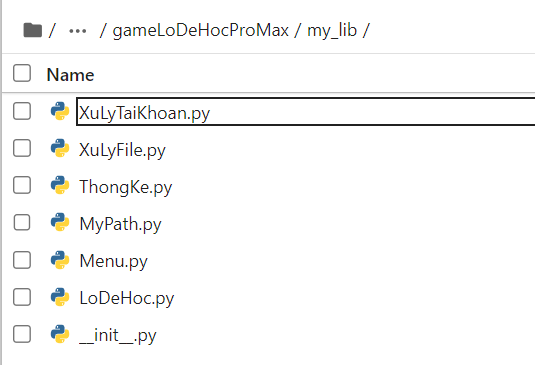


Ta lần lượt chuyển các code chức năng liên quan vào module tương ứng

XuLyTaiKhoan.py
```


from .XuLyFile import *
from .MyPath import *
from IPython.display import clear_output



def tao_tai_khoan(username, password, tong_tien):
    user_info = f"{username},{password},{tong_tien}\n"
    ghi_file([user_info], PATH_DATA_TAI_KHOAN, "a")
    print(f"Tạo tài khoản {username} thành công")

def xoa_tai_khoan(username):
    lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
    for tai_khoan_info in lst_taikhoan:
        if tai_khoan_info[0] == username:
            lst_taikhoan.remove(tai_khoan_info)
            ghi_file([','.join(tai_khoan) + '\n' for tai_khoan in lst_taikhoan], PATH_DATA_TAI_KHOAN, "w")
            print ("Xóa tài khoản thành công")


def kiem_tra_admin(username):
    if username == "admin":
        return 1
    else:
        return 0

def kiem_tra_tai_khoan(username, password):
    global dang_nhap_status, user
    # Đọc dữ liệu từ file tài khoản
    lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
    if lst_taikhoan is None:
        return

    for tai_khoan in lst_taikhoan:
        if tai_khoan[0] == username and tai_khoan[1] == password:
            return kiem_tra_admin(username)
            
def kiem_tra_ton_tai_tai_khoan(username):
    # Đọc dữ liệu từ file tài khoản
    lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
    if lst_taikhoan is None:
        return False

    # Kiểm tra xem tài khoản đã tồn tại chưa
    for tai_khoan in lst_taikhoan:
        if tai_khoan[0] == username:
            return True
    
    return False

def lay_thong_tin_tai_khoan(username):
    try:
        du_lieu_tai_khoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
        if du_lieu_tai_khoan:
            for tai_khoan in du_lieu_tai_khoan:
                if tai_khoan[0] == username:
                    return tai_khoan
        else:
            return None
    except Exception as e:
        print(f"Có lỗi xảy ra: {e}")
        return None
    

def check_dang_nhap(username, password):
    if kiem_tra_tai_khoan(username, password) in (0,1):
        return True
    else:
        return False

def doi_mat_khau(username, password_cu, password_moi):
    lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
    
    for tai_khoan_info in lst_taikhoan:
        if tai_khoan_info[0] == username and tai_khoan_info[1] == password_cu:
            # Cập nhật mật khẩu mới
            tai_khoan_info[1] = password_moi
            # Ghi lại dữ liệu mới vào file
            ghi_file([','.join(tai_khoan) + '\n' for tai_khoan in lst_taikhoan], PATH_DATA_TAI_KHOAN, "w")
            print("Đổi mật khẩu thành công.")
            return

    print("Không tìm thấy tài khoản hoặc mật khẩu cũ không đúng.")
    return

def nap_tien(username, so_tien_nap):
    # Đọc dữ liệu từ file tài khoản
    lst_taikhoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
    
    # Tìm tài khoản trong danh sách
    for tai_khoan_info in lst_taikhoan:
        if tai_khoan_info[0] == username:
            # Cộng số tiền nạp vào số tiền của tài khoản
            tai_khoan_info[2] = str(int(tai_khoan_info[2]) + so_tien_nap)
            # Ghi lại dữ liệu mới vào file
            ghi_file([','.join(tai_khoan) + '\n' for tai_khoan in lst_taikhoan], PATH_DATA_TAI_KHOAN, "w")
            print(f"Đã nạp {so_tien_nap} vào tài khoản {username}.")
            return

    print("Không tìm thấy tài khoản.")
    return

```

XuLyFile.py
```
def ghi_file(data, ten_file, mode):
    try:
        with open(ten_file, mode) as file:
            for line in data:
                file.write(line)
    except Exception as e:
        print(f"Có lỗi xảy ra: {e}")


def doc_file(duong_dan, mode):
    try:
        with open(duong_dan, mode) as file:
            du_lieu = [line.strip().split(',') for line in file.readlines()]
        return du_lieu
    except Exception as e:
        print(f"Có lỗi xảy ra khi đọc file: {e}")
        return None
    

```

ThongKe.py
```
from .XuLyFile import *
from .MyPath import *

def thong_ke_user(username):
    try:
        du_lieu_choi_lo = doc_file(PATH_DATA_CHOI_LO, "r")
        so_lan_choi = 0
        tong_tien_thang = 0
        tong_tien_thua = 0
        so_lan_thang = 0
        so_lan_thua = 0

        for choi_lo in du_lieu_choi_lo:
            if choi_lo[1] == username:
                so_lan_choi += 1
                tong_tien_thang += int(choi_lo[-2])
                tong_tien_thua += int(choi_lo[-1])
                if int(choi_lo[-2]) >  0:
                    so_lan_thang += 1
                else:
                    so_lan_thua += 1
        ti_le_thang = round(so_lan_thang / so_lan_thua, 2) if so_lan_thua > 0 else 0

        # In kết quả
        print("===THỐNG KÊ CHƠI LÔ USER: "+ username+"===")
        print("Số lần chơi lô:", so_lan_choi)
        print("Tổng tiền chơi lô thắng:", tong_tien_thang)
        print("Tổng tiền chơi lô thua:", tong_tien_thua)
        print("Tỉ lệ chơi lô thắng:", ti_le_thang)

    except Exception as e:
        print(f"Có lỗi xảy ra khi thực hiện thống kê: {e}")


def thong_ke_admin():
    try:
        # Đọc dữ liệu từ file choilo.txt
        du_lieu_choi_lo = doc_file(PATH_DATA_CHOI_LO, "r")
        so_luong_tai_khoan = len(doc_file(PATH_DATA_TAI_KHOAN, "r"))
        tong_so_lan_choi_lo = len(du_lieu_choi_lo)
        tong_tien_thang = sum(int(choi_lo[-2]) for choi_lo in du_lieu_choi_lo)
        tong_tien_thua = sum(int(choi_lo[-1]) for choi_lo in du_lieu_choi_lo)
        so_lan_thang = sum(1 for choi_lo in du_lieu_choi_lo if int(choi_lo[-2]) > 0)
        so_lan_thua = tong_so_lan_choi_lo - so_lan_thang

        # Tính tỷ lệ thắng/thua
        ti_le_thang_thua = round(so_lan_thang / so_lan_thua, 2) if so_lan_thua > 0 else 0

        # In kết quả thống kê
        print("===THỐNG KÊ TỔNG HỢP===")
        print("Số lượng tài khoản:", so_luong_tai_khoan)
        print("Tổng số lượt chơi lô:", tong_so_lan_choi_lo)
        print("Tổng tiền chơi lô thắng:", tong_tien_thang)
        print("Tổng tiền chơi lô thua:", tong_tien_thua)
        print("Tỉ lệ thắng/thua:", ti_le_thang_thua)

    except Exception as e:
        print(f"Có lỗi xảy ra khi thực hiện thống kê tổng hợp: {e}")
```

MyPath.py
```
PATH_DATA_TAI_KHOAN = "./data/taikhoan.txt"
PATH_DATA_CHOI_LO = "./data/choilo.txt"
```

Menu.py
```
def menu():
    print("GAME LÔ ĐỀ HỌC")
    print("1. Chơi lô")
    print("2. Đổi mật khẩu")
    print("3. Thống kê")
    print("4. Đăng xuất")

def menu_admin():
    print("ADMIN GAME LÔ ĐỀ HỌC")
    print("1. Tạo tài khoản")
    print("2. Xóa tài khoản")
    print("3. Nạp tiền tài khoản")
    print("4. Thống kê")
    print("5. Đăng xuất")
```

LoDeHoc.py
```
import random
from .XuLyTaiKhoan import *
from datetime import datetime

def quay_so():
    danh_sach_giai = {}

    ten_giai = ["GIẢI NHẤT", "GIẢI NHÌ", "GIẢI BA", "GIẢI TƯ", "GIẢI NĂM", "GIẢI SÁU", "GIẢI BẢY"]

    for giai in ten_giai:
        so = ""
        for i in range(5):
            so += str(random.randint(0, 9))  # Tạo một chữ số ngẫu nhiên từ 0 đến 9 và thêm vào số
        danh_sach_giai[giai] = so

    return danh_sach_giai

def in_danh_sach_giai(danh_sach_giai):
    print('-' * 20)
    print("---DANH SÁCH GIẢI---")
    for giai, so in danh_sach_giai.items():
        print(f"{giai}: {so}")
    print('-' * 20)

def nhap_so_lo():
    while True:
        so_lo_input = input("Nhập các số lô bạn muốn chơi, cách nhau bằng dấu phẩy: ")
        danh_sach_so_lo = so_lo_input.split(",")

        so_lo_hop_le = True

        for so_lo in danh_sach_so_lo:
            if len(so_lo) != 2 or not so_lo.isdigit():
                print("Số lô nhập không hợp lệ. Vui lòng nhập lại.")
                so_lo_hop_le = False
                break

        if so_lo_hop_le:
            return danh_sach_so_lo
def nhap_tien_cuoc(username,so_lo):
    tong_tien = int(lay_thong_tin_tai_khoan(username)[2])
    while True:
        tien_cuoc = input("Nhập tiền cược mà bạn muốn cược (tiền cược < tổng tiền bạn có): ")
        if tien_cuoc.isdigit() and int(tien_cuoc) * so_lo < tong_tien:
            return int(tien_cuoc)
        else:
            print("Nhập sai định dạng hoặc quá tổng tiền. Nhập lại")


def cap_nhat_tien_choi_lo(username, tong_tien):
    try:
        du_lieu_tai_khoan = doc_file(PATH_DATA_TAI_KHOAN, "r")
        if du_lieu_tai_khoan:
            for i, tai_khoan in enumerate(du_lieu_tai_khoan):
                if tai_khoan[0] == username:
                    du_lieu_tai_khoan[i][2] = str(tong_tien)  # Cập nhật số tiền
                    ghi_file([','.join(tai_khoan) + '\n' for tai_khoan in du_lieu_tai_khoan], PATH_DATA_TAI_KHOAN, "w")
                    return
    except Exception as e:
        print(f"Có lỗi xảy ra khi cập nhật thông tin tài khoản: {e}")


def luu_thong_tin_choi_lo(username, danh_sach_so_lo, tien_cuoc, danh_sach_giai,  tien_thang, tien_thua):
    try:
        thoi_gian_choi = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        thong_tin = f"{thoi_gian_choi},{username},{','.join(danh_sach_so_lo)},{tien_cuoc}," \
                    f"{','.join(danh_sach_giai.values())},{tien_thang},{tien_thua}\n"
        
        ghi_file(thong_tin, PATH_DATA_CHOI_LO, "a")
        print("Thông tin về lần chơi lô đã được lưu.")
        
        # Cập nhật số tiền thắng/thua vào tài khoản

    except Exception as e:
        print(f"Có lỗi xảy ra khi lưu thông tin: {e}")

def game_quay_so(username, danh_sach_so_lo, tien_cuoc):
    tong_tien = int(lay_thong_tin_tai_khoan(username)[2])

    danh_sach_giai = quay_so()
    
    in_danh_sach_giai(danh_sach_giai)
    dem_so_lo_trung = 0
    so_lo_trung = []  # Danh sách lưu trữ số lô trúng

    print("Các số lô bạn chơi là:", danh_sach_so_lo)
    for giai, so_giai in danh_sach_giai.items():
        for so_lo in danh_sach_so_lo:
            if so_lo == so_giai[-2:]:
                dem_so_lo_trung += 1
                so_lo_trung.append(so_lo)
    tien_thang = 0  # Khởi tạo tien_thang
    tien_thua = 0   # Khởi tạo tien_thua

    if dem_so_lo_trung > 0:
        tien_thang = tien_cuoc * dem_so_lo_trung * 70
        tien_thua = tien_cuoc * (len(danh_sach_so_lo) - dem_so_lo_trung)

        tong_tien += tien_thang - tien_thua

        print(f"Bạn đã trúng {dem_so_lo_trung} nháy!")
        print("Các số lô trúng:", ", ".join(so_lo_trung))
        print(f"Số tiền bạn trúng là {tien_thang}")
        print(f"Số tiền bạn thua là {tien_thua}")
        print(f"Tổng tiền bạn có là {tong_tien}")
    else:
        tien_thua = tien_cuoc * len(danh_sach_so_lo)
        tong_tien -= tien_thua

        print("Bạn đã thua lô!")
        print(f"Số tiền bạn thua là {tien_thua}")
        print(f"Tổng tiền bạn còn là {tong_tien}")

    # Lưu thông tin về lần chơi lô vào file
    luu_thong_tin_choi_lo(username, danh_sach_so_lo, tien_cuoc, danh_sach_giai, tien_thang, tien_thua)
    cap_nhat_tien_choi_lo(username, tong_tien)
```

`__init__.py`
```
from .XuLyFile import *
from .MyPath import *
from .XuLyTaiKhoan import *
from .ThongKe import *
from .Menu import *
from .LoDeHoc import *
```

## Code mẫu

Mọi người có thể clone code mẫu tại đường dẫn rồi chạy trên jupyter:
https://github.com/dangblack/gameLoDeHocProMax/
